# Training Models
This notebook is dedicated to chapter 4 of the book.

Exploring how models can be trained

## Linear Regression Model
### Definition
We can define the linear model as follows:
$$
\hat{y}=\theta_{0} + \theta_{1}x_{1}+\theta_{2}x_{2}+\dots+\theta_{n}x_{n}
$$
Where:
* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $x_{i}$ is the $x^{ith}$ feature value (i.e., the instance attribute values)
* $\theta_{j}$ is the $j^{th}$ model parameter including the bias term $\theta_0$ and the feature weights $\theta_1,\theta_2,\dots,\theta_n$

And in vectorized form:
$$
\hat{y}=h_{\theta}(X)=\theta^T \cdot X
$$
Where:
* $\hat{y}$ is again the predicted value
* $\theta$ is the model's *parameter vector*, containing the bias term $\theta_0$, and the feature weights $\theta_1$ to $\theta_n$
* $\theta^T$ is the transpose of $\theta$, a row vector instead of a column vector.
* $X$ is the instance's *feature vector*, containing $x_0$ to $x_n$ **with $x_0$ always equal to $1$.**
* $\theta^TX$ is the dot product of $\theta^T$ and $X$
* $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$

### Metrics
A linear model consists on fitting the equation of a line (the model) on a series of data points that resembles a line. We are going to play with the model parameters, i.e., $\theta_{n}$ till we find a line that best fits the data. For doing this, we need a measure that tell us this. In this case, we can think of this measurement as the distance between each data point and the line we are fitting, the less the difference the better. This metric is called *Mean Squared Error* or *MSE*:

$$
MSE(X,h_{\theta})=\frac{1}{m}\sum_{i=1}^{m} (\theta^{T} \cdot x^{(i)} - y^{(i)})^2
$$

This is basically, adding all the differences between the point in the line (predicted value) and the actual value then square it (to deal with negative values) and finaly averaging it depending on the number of samples.

This is then a Minimization problem as we want to find the values for $\theta_{n}$ such that minimizes the value of $MSE(\theta)$

### The normal equation
So the definition of this problem as a formula would be:
$$
\hat{\theta}=(X^T \cdot X)^{-1} \cdot X^T \cdot y
$$
Where:
* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
* $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

### Visualization

In [1]:
import numpy as np

np.random.seed(12345)
# Generate 100 points, rand receives the dimensions of the returning vector,
# in this case, 100 rows and 1 column
X = 2 * np.random.rand(100, 1)
# This is basically applying the model 'y = 3x + 4' however, we are adding noise with a random normal distribution to simulate some dispersion in the data points
y = 4 + 3 * X + np.random.randn(100, 1)

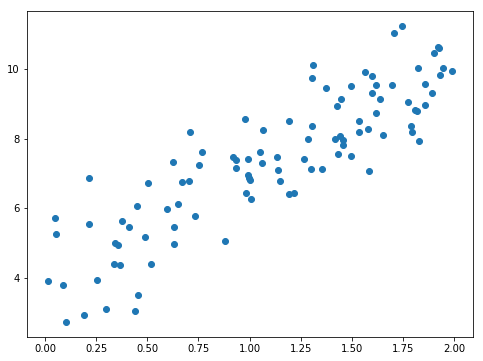

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.show()

Now, let's compute $\hat{\theta}$ using the normal function and with help of numpy's linear algebra packages to calculate the inverse of a matrix (-1 exponent) and the dot product.

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
theta_best

array([[3.9801249 ],
       [3.05940348]])

Notice the actual values of the function we used to generate the data (+ Gaussian Noise) and look at what we obtained here, they resemble pretty well the original values, considering the noise off course.

Now, let's make predictions using these thetas as model parameters and plot the line and appreciate it graphically

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 =1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.9801249 ],
       [10.09893186]])

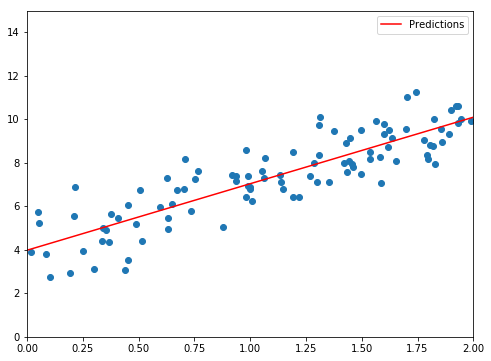

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(X_new, y_predict, 'r-')
plt.scatter(X, y)
plt.axis([0, 2, 0, 15]) # X axis from 0 to 2, Y axis from 0 to 15
plt.legend(["Predictions"])
plt.show()

Equivalent code using scikit learn

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.9801249]), array([[3.05940348]]))

### Notes:
This method works good for large number of samples, $O(m)$, but starts to perform poorly when the number of features grows. From $O(n^{2.4})$ to $O(n^3)$

## Gradient Descent
This technique consists in taken steps in the direction where the values of the cost functions become smaller. It's like going downhill, you might want to go in the steepest downward direction to get to the bottom.

The MSE cost function is like a bowl with a global minima, we can then, pick any point in the function and go in the direction where the value becomes smaller. The amount of each step is called *learning rate*, depending on the value, we can reach the global minima if we wait long enough for small step sizes.

![Gradient Descent](https://saugatbhattarai.com.np/wp-content/uploads/2018/06/gradient-descent-1.jpg)

### Important:
If we have features with different scales, the bowl can look enlongated, this means that reaching the minima might take a long time. I this particular case, this is one of the reasons why it's important to work with data under the same scale.

## Batch Gradient Descent
*To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a bit. **This is called partial derivative*** (Directly from the book)

The partial derivative of MAE with respect to $\theta$ is:
$$
\frac{\partial}{\partial\theta_j} MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m} (\theta^{T} \cdot x^{(i)} - y^{(i)} ) x_j^{(i)}
$$

Now, we can compute all the partial derivatives, one for each model parameter and this will give us the gradient vector $\bigtriangledown_{\theta}MSE(\theta)$:

$$
\bigtriangledown_{\theta}MSE(\theta) = 
\begin{bmatrix}
\frac{\partial}{\partial_0} MSE(\theta) \\
\frac{\partial}{\partial_1} MSE(\theta) \\
\vdots \\
\frac{\partial}{\partial_n} MSE(\theta)
\end{bmatrix} = \frac{2}{m}X^T \cdot (X \cdot \theta - y)
$$

Notice this means we will be calculating the gradient in the whole data set X, this is why this method is very slow for large datasets. However scales well for a great number of features.

What the gradient vector tell us, is the direction where the function moves uphill. Since we want to go downhil, we just need to go to the opposite direction. To do this, we must substract $\bigtriangledown_{\theta}MSE(\theta)$ from $\theta$. This is where the learning rate $\eta$ is used. We need to multiply the learning rate by the gradient vector to get the size of the next downhill step.

$$
\theta^{(next step)}=\theta - \eta \bigtriangledown_{\theta} MSE(\theta)
$$

Now, let's look at a quick implementation of this algorithm:


In [7]:
def linear_regression_gd(X, y, eta=0.1, n_iterations=1000):
    """Trains a linear regression model with gradient descent.
    
    Keyword arguments:
    X -- features
    y -- target values
    eta -- the learning rate
    n_iterations -- the number of iterations
    """
    
    theta = np.random.rand(2,1) # random initialization, two parameters, theta0 and theta1
    m = X.shape[0] # number of samples
    
    for iteration in range(n_iterations):
        # applying the partial derivative of MSE, notice X_b.dot(theta) is equal to the predicted value xi
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        # here we update theta, the parameters, in the oposite direction of the gradient by the learning rate amount
        theta = theta - eta * gradients

    return theta

In [8]:
eta = 0.1 # learning rate
n_iterations = 1000

linear_regression_gd(X_b, y, eta, n_iterations)

array([[3.9801249 ],
       [3.05940348]])

We obtained the same model parameters as with the normal equation!

Gradient descent depends on the hyperparameters, *learning rate* and *# of iterations*. The model parameters are sensible to these values, let's see what happens if we use different values.

In [9]:
def linear_regression_gd_steps(X, y, eta, n_iterations=10):
    result = []
    for i in range(n_iterations):
        result.append(linear_regression_gd(X_b, y, eta, i + 1))
    return result
    
etas = {
    0.02: linear_regression_gd_steps(X_b, y, 0.02),
    0.1: linear_regression_gd_steps(X_b, y, 0.1),
    0.5: linear_regression_gd_steps(X_b, y, 0.5)
}

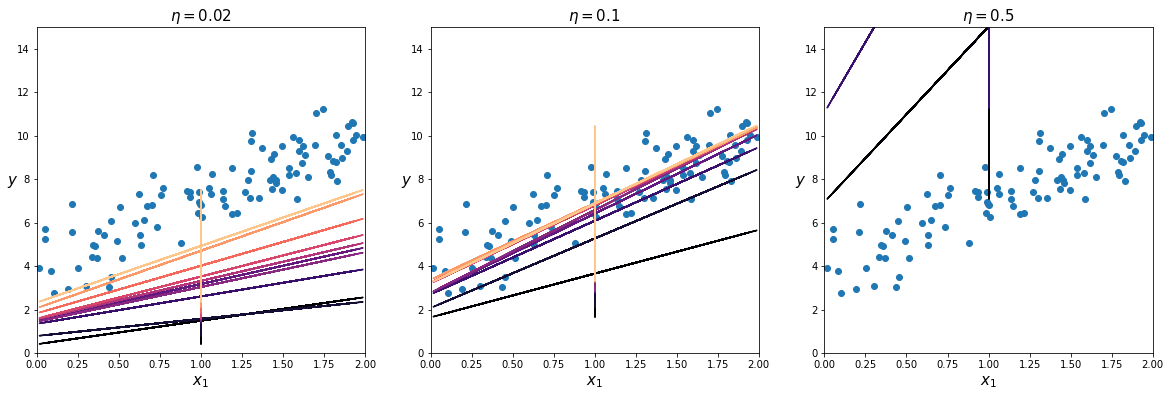

In [10]:
%matplotlib inline

def plot_iteration_evolution(X_b, y, eta):
    interval = int(len(plt.cm.magma.colors)/len(eta[1]))
    colors = plt.cm.magma.colors[::interval]
    color_iter = iter(colors)

    plt.scatter(X, y)
    plt.title("$\eta={}$".format(eta[0]), fontsize=15)
    plt.xlabel("$x_1$", fontsize=15)
    plt.ylabel("$y$", rotation=0, fontsize=15)
    plt.axis([0, 2, 0, 15])
    for theta in eta[1]:
        predictions = X_b.dot(theta)
        color = next(color_iter)
        plt.plot(X_b, predictions, color=color)
        

plt.figure(figsize=(20, 6))

for index, eta in enumerate(etas.items()):
    plt.subplot(1, 3, index + 1)
    plot_iteration_evolution(X_b, y, eta)

plt.show()

We can observe here the evolution of three different learning rates, the lighter the line the higher the number of iterations, (the dark line means is the first iteration).

* Notice with $0.02$ within 10 iterations it wasn't able to converge, however is consistently approximating to optimal solution.
* Notice with $0.1$ within 10 iterations converves really quick.
* Notice with $0.5$ within just 2 iterations not only does not converges, it also fires completely outside the solution. This is an example of a too-large learning rate making big jumps in the bowl and never reaching the bottom.

## Stochastic Gradient Descent

The main problem with the Batch gradient descent is that it needs to use the whole data set each iteration to compute the gradient, hence for large data sets it behaves poorly or takes long to converge, assuming the dataset will fit in memory.

SGD follows the opposite approach, on each iteration, randomly (stochastic) takes a sample, a single one, calculates the gradient and update the parameters. In one side, it deals pretty well with large datasets as it only needs to have a single instance in memory to calculate the gradient, however contrary to BGD, it will approximate to the solution abruptly. You will notice each iteration jumps back & ford instead of a nice step-by-step evolution.

Another thing, is that, given its jumpy nature, it may actually be able to find the global minima instead of just reaching a local minima. However, still, because of the same reason, it won't be able to reach the real gloabl minima, just approximate to it. One way of solving this issue, is to modify the *learning rate* on schedule, so it will start with big steps to avoid the local minima, but as soon as it start to find the global minima, reduce the value.

In [11]:
n_epochs = 50
t0, t1 = 5, 50
m = len(X_b)

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.rand(2, 1)
steps = []
eta_hist = []
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        eta_hist.append(eta)
        theta = theta - eta * gradients
        steps.append(theta)
        
theta

array([[3.97555829],
       [3.04784538]])

Notice here the first and last 10 etas used.

We can observe they are gradually decreasing over time

In [12]:
print("First 10 eta: ", eta_hist[:10])
print("Last 10 eta: ", eta_hist[-10:])

First 10 eta:  [0.1, 0.09803921568627451, 0.09615384615384616, 0.09433962264150944, 0.09259259259259259, 0.09090909090909091, 0.08928571428571429, 0.08771929824561403, 0.08620689655172414, 0.0847457627118644]
Last 10 eta:  [0.000992063492063492, 0.0009918666931164452, 0.0009916699722332407, 0.00099147332936744, 0.0009912767644726407, 0.0009910802775024777, 0.0009908838684106222, 0.0009906875371507827, 0.0009904912836767037, 0.0009902951079421667]


We approached closely to the solution given by the batch gradient descent, and we only needed 50 iterations over all the dataset instead of 1000. So this method, despite not reaching the actual global minima, tends to converge faster.

Now let's observe the evolution of the ten most significant steps.

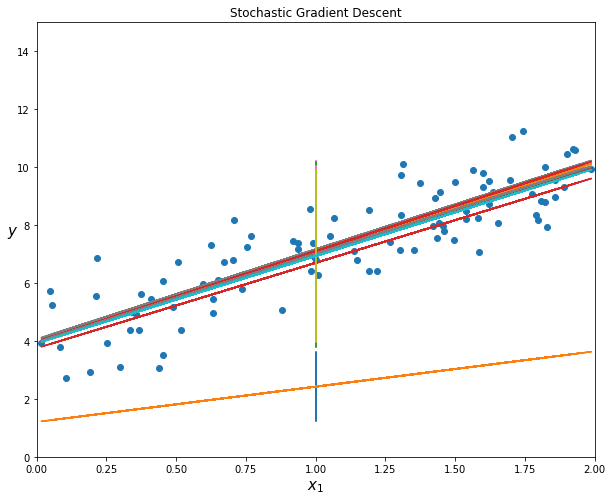

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
plt.title("Stochastic Gradient Descent")
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.axis([0, 2, 0, 15])
for step in steps[::500]:
    predictions = X_b.dot(step)
    plt.plot(X_b, predictions)
    
plt.show()

We can observe, it took few steps to approach to a converging point.

We can train this with Scikit Learn using ```SGDRegressor```

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(eta0=0.1, max_iter=50)
sgd_reg.fit(X, y.ravel()) # Use ravel to convert the column vector y (100,1) to a 1-D vector (100)
print("Coef: {}, Intercept: {}".format(sgd_reg.coef_, sgd_reg.intercept_))

Coef: [3.10819672], Intercept: [4.01600025]


Here we can observe we reached convergence. Let's plot it.

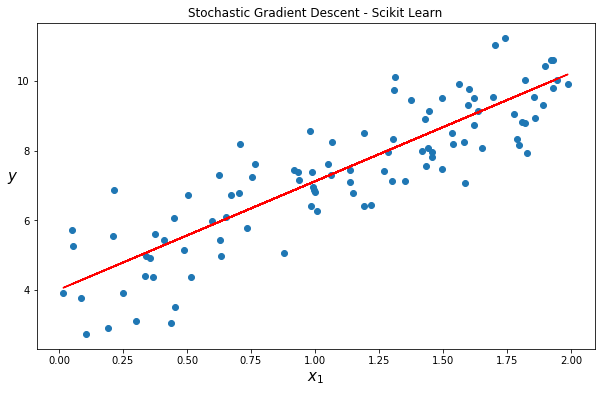

In [15]:
predictions = sgd_reg.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.title("Stochastic Gradient Descent - Scikit Learn")
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.plot(X, predictions, 'r-')
plt.show()

## Mini Batch Gradient Descent
This approach is a combination of the two previous ones, taking advantage of each. Instead of iterating over all the training set (as in Batch GD) and instance by instance (as in SGD) the idea is to iterate over a small random sub set of the training set (called mini-batches) each epoch. This will boost up the learning speed and take advantage of the computing power for matrix compuntations. However is more prone to converge into local minima than SGD.

In [16]:
from sklearn.base import BaseEstimator, RegressorMixin

class MBGDRegressor(BaseEstimator, RegressorMixin):    
    def __init__(self, n_epochs, learning_rate='geometric', eta0=0.1, ls_rate=None, mini_batch_size=None):
        self.n_epochs = n_epochs
        self.eta0 = eta0
        self.mini_batch_size = mini_batch_size
        self.learning_rate = learning_rate
        self.thetas = []
        self.intercet_ = 0.
        self.coef_ = 0.
        self.best_parameters = 0.
        if ls_rate:
            self.ls_rate = ls_rate
        else:
            self.ls_rate = eta0 / mini_batch_size
        
    def __lrs(self):
        n = 0
        while(True):
            if self.learning_rate == 'geometric':
                yield (self.eta0 * pow(1 / (1 + self.ls_rate), n))
                n += 1
            elif self.learning_rate == 'constant':
                yield self.eta0
            else:
                raise ValueError('the learning rate mode is not valid. Valid ones: [geometric, constant]')
    
    def fit(self, X, y):
        theta = np.random.rand(X.shape[1] + 1, 1)
        X = np.c_[np.ones((X.shape[0], 1)), X]
        # Normal iteration over all the epochs
        for epoch in range(self.n_epochs):
            # Take a random 'mini_batch_size'
            mb_index = np.random.randint(0, max(X.shape[0] - 1, 1), self.mini_batch_size)
            X_mb = X[mb_index]
            y_mb = y[mb_index]

            gradients = 2/self.mini_batch_size * X_mb.T.dot(X_mb.dot(theta) - y_mb)
            lrs = next(self.__lrs())
            
            theta = theta - lrs * gradients
            self.thetas.append(theta)
        self.intercept_ = self.thetas[-1][0]
        self.coef_ = self.thetas[-1][1:].T
        self.best_parameters = self.thetas[-1]
                
    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return X.dot(self.best_parameters)

In [17]:
epochs = 1000
theta = np.random.rand(2, 1)
lr = 0.1
for epoch in range(0, epochs):
    gradients = 2/X_b.shape[0] * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - lr * gradients
theta

array([[3.9801249 ],
       [3.05940348]])

In [18]:
np.random.seed(12345)
mbgd_reg = MBGDRegressor(n_epochs=10, learning_rate='geometric', eta0=0.1, mini_batch_size=20)
mbgd_reg.fit(X, y)
mbgd_reg.intercept_,mbgd_reg.coef_

(array([3.53614593]), array([[3.36405375]]))

In [19]:
len(mbgd_reg.thetas)

10

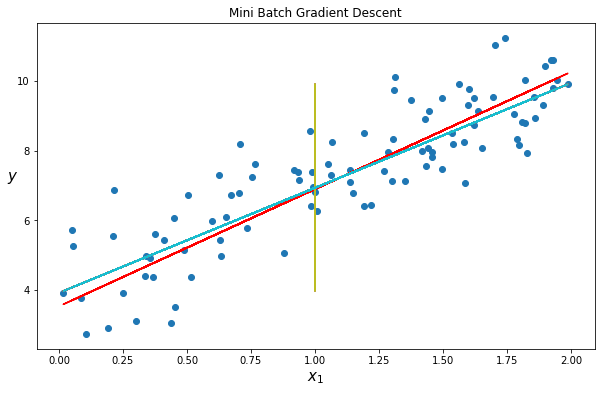

In [20]:
predictions = mbgd_reg.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.title("Mini Batch Gradient Descent")
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.plot(X, predictions, 'r-')
for theta in mbgd_reg.thetas:
    predictions = X_b.dot(step)
    plt.plot(X_b, predictions)
plt.show()

Notice that with only 10 epochs and with the same learning rate, with a mini batch size of 20 we approach to convergence really close.

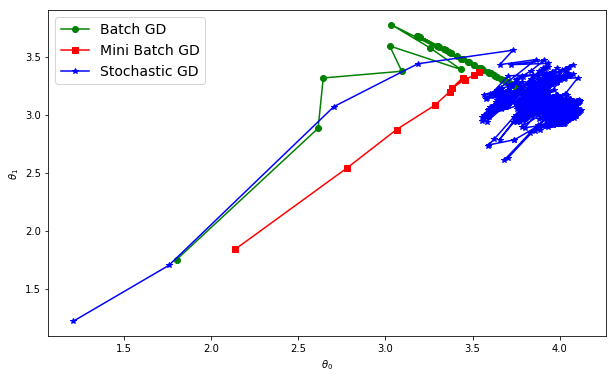

In [21]:
mbgd_steps = np.array(mbgd_reg.thetas).reshape(10, 2)
sgd_steps = np.array(steps).reshape(5000, 2)
bgd_steps = bgd_steps = np.array(linear_regression_gd_steps(X_b, y, 0.1, 1000)).reshape(1000, 2)

plt.figure(figsize=(10, 6))
plt.plot(bgd_steps[:,0], bgd_steps[:,1], 'g-o', label='Batch GD')
plt.plot(mbgd_steps[:,0], mbgd_steps[:,1], 'r-s', label='Mini Batch GD')
plt.plot(sgd_steps[:,0], sgd_steps[:,1], 'b-*', label='Stochastic GD')
plt.legend(loc='upper left', fontsize=14)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

I'm starting from different values from the book, for both data points and the initial theta values, hence it's normal that the above plot differs from the original. I'm aware this would need to be fixed. However, there is something similar in the patterns of each step. Notice the erratic behavior of the stochastic gradient descent, the short and more concise steps of the mini batches and the smooth ending of the batch gradient descent. Though on the later, we can observe an erratic path at the beginning.

## Polynomial regression
Not all the data will behave and fit in a straight line. For more complex cases we can fit curve functions to data points by elevating the parameters to some power then fit the linear model.

In [22]:
np.random.seed(12345)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

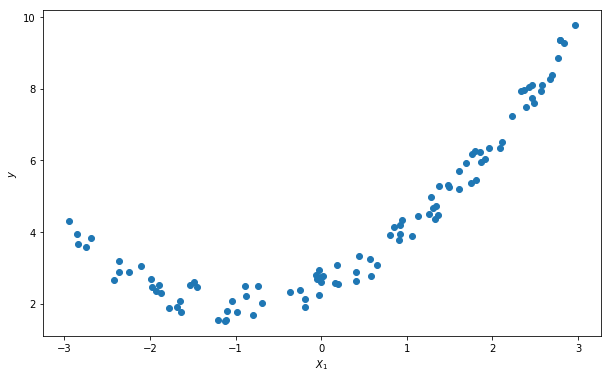

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.show()

Notice we deliberately generated cuadratic shape data with some noise. By looking at the plot, we could imagine this is a parabola, i.e. a polynomial of 2nd degree, so now we are going to infer these properties for the model.

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("Original feature: ", X[0])
print("Original feature + the square of it: ", X_poly[0])

Original feature:  [2.57769656]
Original feature + the square of it:  [2.57769656 6.64451954]


Now if we use the suared values to fit a linear regression, we would be able to fit a model

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_,lin_reg.coef_

(array([2.53172975]), array([[0.97568322, 0.49167564]]))

In [26]:
lin_reg.coef_.shape

(1, 2)

In [27]:
def plot_polynomial_regression(X, y, model):
    min_x = round(X.min())
    max_x = round(X.max())
    X_new=np.linspace(min_x, max_x, X.shape[0]).reshape(X.shape[0], 1)
    X_new_poly = poly_features.transform(X_new)
    y_new = model.predict(X_new_poly)
    intercept = model.intercept_[0]
    coef = model.coef_[0]

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y)
    plt.xlabel("$X_1$")
    plt.ylabel("$y$")
    plt.plot(X_new, y_new, "r-", linewidth=2, label=r"$y={:.2f}x^2+{:.2f}x+{:.2f}$".format(coef[1], coef[0], intercept))
    plt.legend(loc='upper left', fontsize=14)
    plt.show()

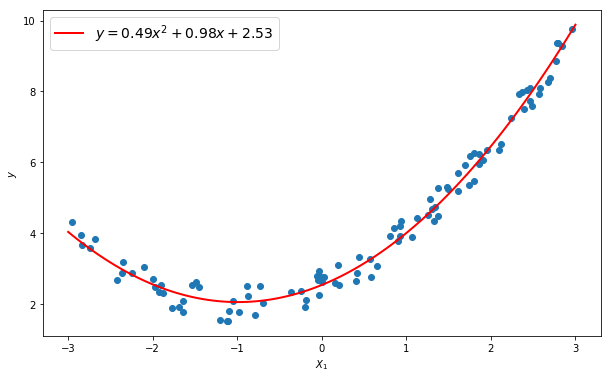

In [28]:
plot_polynomial_regression(X, y, lin_reg)

This looks good, notice the original function was $0.5x^2 + x + 2 + Gaussian Noise$, and according to this training we obtained: $0.49x^2 + 0.97x + 2.5$ which is pretty close.

Here it is necessary to generate another linespace within the same range as we see in the scatter plot to generate a smooth line as the best fit. We could use the original set, but since it contains noise, we would endup with a plot difficult to understand the line. (see plot below) So basically we are going to generate 100 points evenly distributed within the range of the data we observe, this will make that the plot follow a single path, forming the line we are expecting to see.

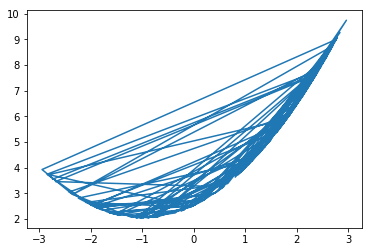

In [29]:
n = len(X)
plt.plot(X[:n], lin_reg.predict(X_poly[:n]))
plt.show()

Let's see if we can get the same result using my own implemented linear regression model.

In [30]:
mbgd_reg = MBGDRegressor(n_epochs=200, learning_rate='geometric', eta0=0.01, mini_batch_size=30)
mbgd_reg.fit(X_poly, y)

In [31]:
mbgd_reg.intercept_,mbgd_reg.coef_

(array([2.2342768]), array([[0.97190765, 0.54621958]]))

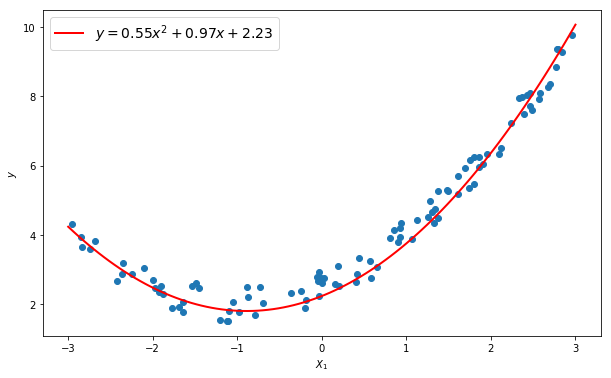

In [32]:
plot_polynomial_regression(X, y, mbgd_reg)

Look! pretty close to what scikit learn obtained.

Scikit-Learn: $0.49x^2 + 0.97x + 2.5$ 

Me: $0.56x^2+0.98x+2.17$

Not bad!

What if we trained with a high degree polynomial?

In [33]:
degree = 40
poly_features_hdegree = PolynomialFeatures(degree=degree)
poly_features = PolynomialFeatures(degree=2)

X_hdegree_poly = poly_features_hdegree.fit_transform(X)
X_2_poly = poly_features.fit_transform(X)

mbgd_hdegree_reg = MBGDRegressor(n_epochs=200, learning_rate='geometric', eta0=0.01, mini_batch_size=30)
mbgd_hdegree_reg.fit(X_hdegree_poly, y)

lr_hdegree_reg = LinearRegression()
lr_hdegree_reg.fit(X_hdegree_poly, y)

lr_2_reg = LinearRegression()
lr_2_reg.fit(X_2_poly, y)

lr_reg = LinearRegression()
lr_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

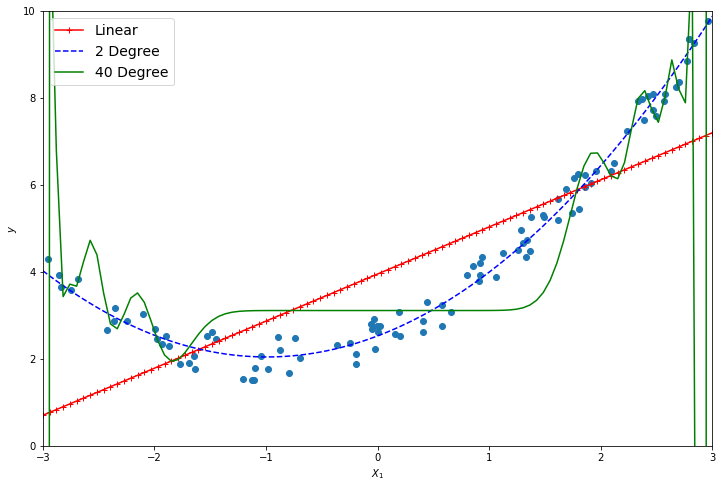

In [34]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y)
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.axis([-3, 3, 0, 10])

min_x = round(X.min())
max_x = round(X.max())
X_new=np.linspace(min_x, max_x, X.shape[0]).reshape(X.shape[0], 1)
X_new_2poly = poly_features.transform(X_new)
X_new_hdegreepoly = poly_features_hdegree.transform(X_new)

y_linear = lr_reg.predict(X_new)
y_2degree = lr_2_reg.predict(X_new_2poly)
y_hdegree = lr_hdegree_reg.predict(X_new_hdegreepoly)

plt.plot(X_new, y_linear, 'r-+', label='Linear')
plt.plot(X_new, y_2degree, 'b--', label='2 Degree')
plt.plot(X_new, y_hdegree, 'g-', label='{} Degree'.format(degree))

plt.legend(loc='upper left', fontsize=14)
plt.show()

Look that in higher degree polynomials, despite in some parts trying to reach every point which signals overfitting, the rest of the function does not fit well. In the opposite side, the linear model is underfitting the data.

### Learning curves
One way to measure how simple or complex is a model, and evaluate if is overfitting or underfitting the data, is to look at the learning curves. This is done by training the model several times in subsets of the original training set and comparing them with the testing set.

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y, axis):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [],[]
    
    for m in range(1, len(X_train)):
        # train the model in increasing subsets of the training set
        model.fit(X_train[:m], y_train[:m])
        # predict in the same subset
        y_train_predict = np.nan_to_num(model.predict(X_train[:m]))
        # and finally predict in all the validation set
        y_val_predict = np.nan_to_num(model.predict(X_val))
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    plt.figure(figsize=(12, 8))
    plt.title('Learning curves - Training vs Validation')
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    if axis:
        plt.axis(axis)
    plt.show()
    

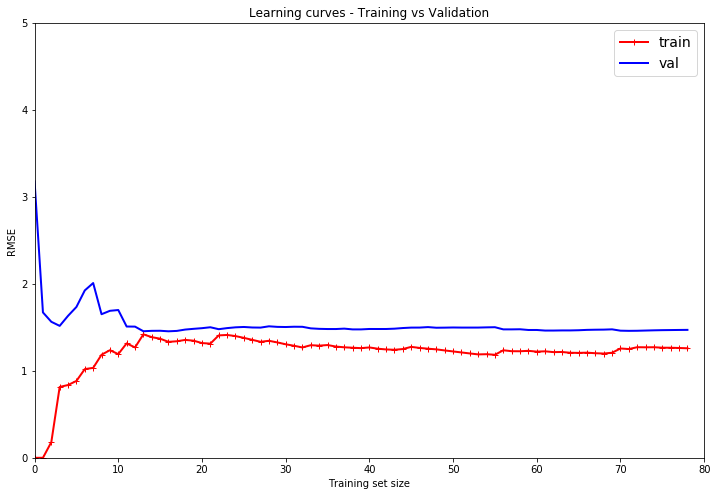

In [40]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y, [0, 80, 0, 5])

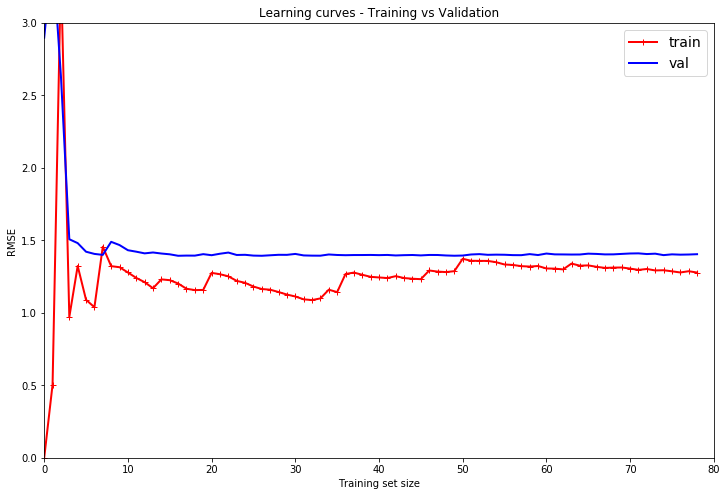

In [42]:
mbgd_hdegree_reg = MBGDRegressor(n_epochs=200, learning_rate='geometric', eta0=0.01, mini_batch_size=30)
plot_learning_curves(mbgd_hdegree_reg, X, y, [0, 80, 0, 3])

How to interpret it:
* When the model is presented to a single instance, it is able to predict it perfectly, hence the training set starts at zero error.
* In the other hand, this very same model performs poorly in the validation set as it has many more points that naturally don't fit the linear data hence a high error.
* As we add more instances to the training set, inevitably we will have a higher error in the training set since once more, the data points don't actually perfectly fit a straight line.
* But at the same time, the error in the validation set start to decrease, this is because as new samples are presented to the training set, the model is able to generalize more.
* At some point, both reaches a plateau around some error value. Depending on how high is this value, you might have fallen in an underfitting model.

**Note:** When underfitting, adding more instances won't help, in this case you should aim for a more complex model or better features. In this case, since we are dealing with a polynomial data, the best would be to train a polynomial model instead of linear.

Now, let's see what happens when we train a polynomial model.

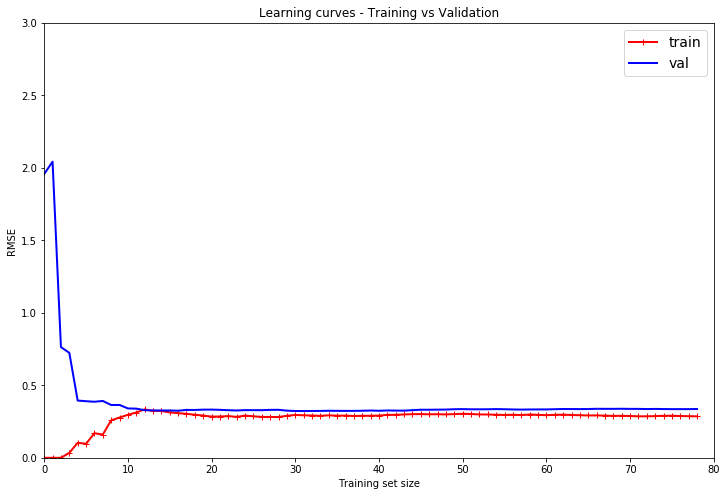

In [44]:
plot_learning_curves(lin_reg, X_poly, y, [0, 80, 0, 3])

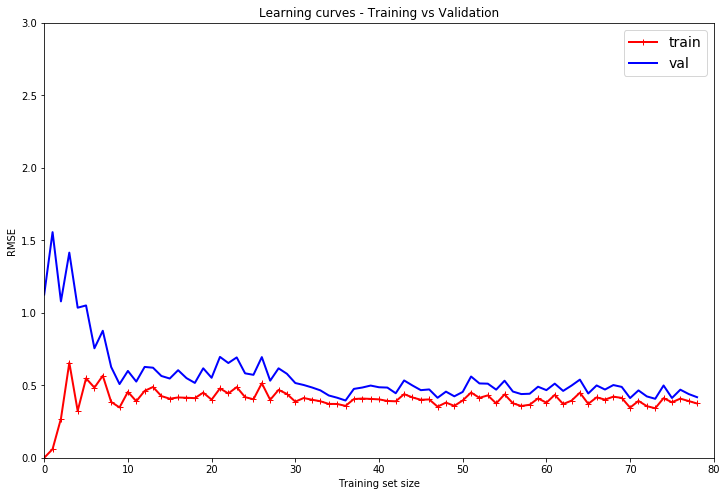

In [45]:
plot_learning_curves(mbgd_hdegree_reg, X_poly, y, [0, 80, 0, 3])

We have an improvement in the learning curve, the plateau now sits below 1.0, however, despite not so much in this case, if we see a gap between the training and validation curves, in particular with the training being below, this probably mean the model is overfitting, as it is learning all the training data but generalizing poorly, i.e., the validation predictions are not that good.

The gap can bee observed when we use an overly complex model, i.e., a higher degree polynomial.

In [46]:
poly_10_features = PolynomialFeatures(degree=10)
X_10_poly = poly_10_features.fit_transform(X)

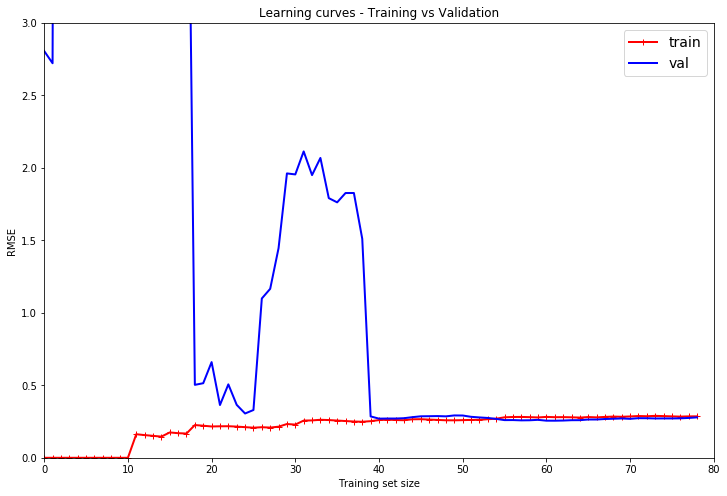

In [47]:
plot_learning_curves(lin_reg, X_10_poly, y, [0, 80, 0, 3])

One way to deal with overfitting data is to add more training data.

## Ridge regression
One can try to constrain the model parameters to avoid overfitting, e.g., by limiting the degrees of freedom in a polynomial regression. This is called regularization, one option is **Ridge Regression** which consists in adding a *regularization term* equal to $\alpha\sum_{i=1}^n \theta_i^2$ to the cost function. This forces the algorithm to not only fit the data but also keep the model weights as small as possible.

This regularization term should only be added to the cost function during training but when evaluating the model you want to evaluate it using the unregularized performance measure.

The hyperparameter $\alpha$ controlas how much you want to regularize the model. If $\alpha = 0$ then Ridge regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.

$$
J(\theta)=MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^n \theta_i^2
$$

Notice we do not regularize $\theta_0$ (the sum starts in $i=1$). If we define **w** as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is simply equal to $\frac{1}{2}(||w||_2)^2$, where $||\cdot||_2$ represents the $l_2$ norm of the weight vector. For Gradient Descent, just add $\alpha w$ to the MSE gradient vector

## Utils
Geometric sequence generator for the learning schedule

In [ ]:
def lrs(eta0, rate):
    n = 0
    while(True):
        yield (eta0 * pow( 1/ (1 + rate), n))
        n += 1

In [ ]:
etas = lrs(0.1, 0.1/50)

In [ ]:
next(etas)

In [ ]:
test = np.array([1.0, float('NaN')])

In [ ]:
import sys